In [234]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

sns.set()

# Loading the raw data

In [235]:
raw_data = pd.read_csv('car_data.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Preprocessing

In [236]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variables of interest

In [237]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Missing values

In [238]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [239]:
data.fillna(data.loc[:, ['Price', 'EngineV']].mean(), inplace=True)
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# Distribution Probability Function

## Price

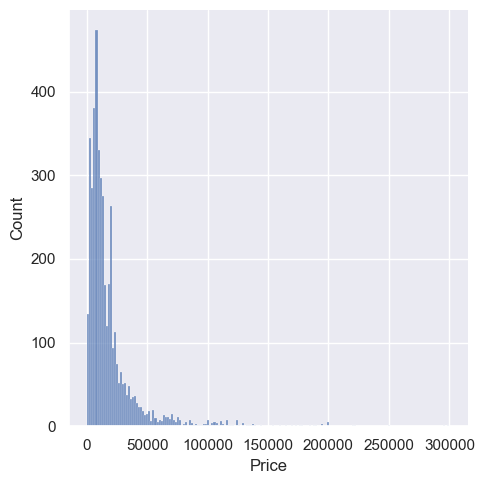

In [240]:
sns.displot(data.loc[:, 'Price'])

## Mileage

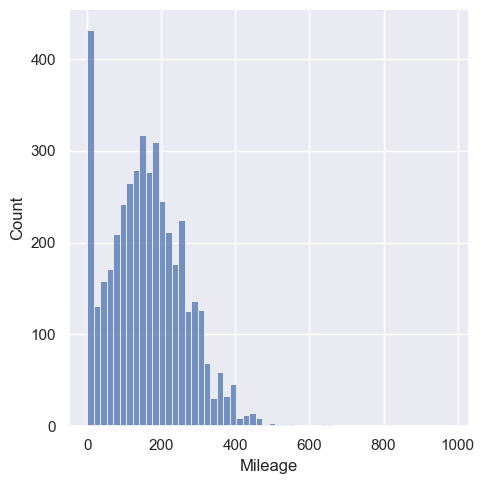

In [241]:
sns.displot(data.loc[:, 'Mileage'])

## Year

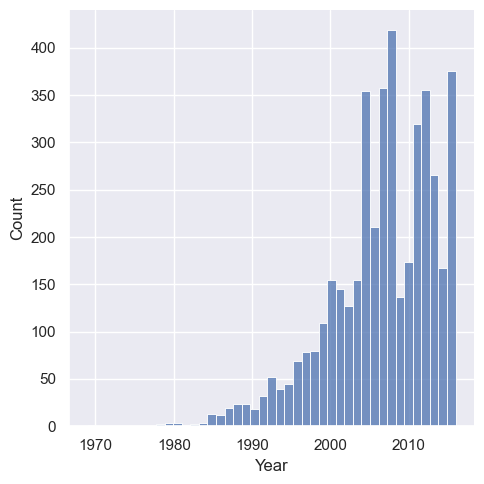

In [244]:
sns.displot(data.loc[:, 'Year'])

## Engine Volume

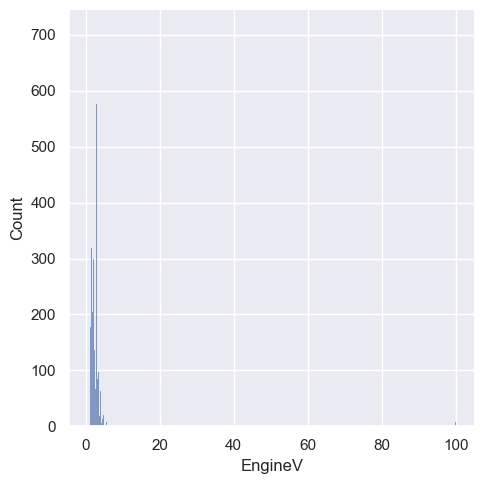

In [242]:
sns.displot(data.loc[:, 'EngineV'])

### Outliers

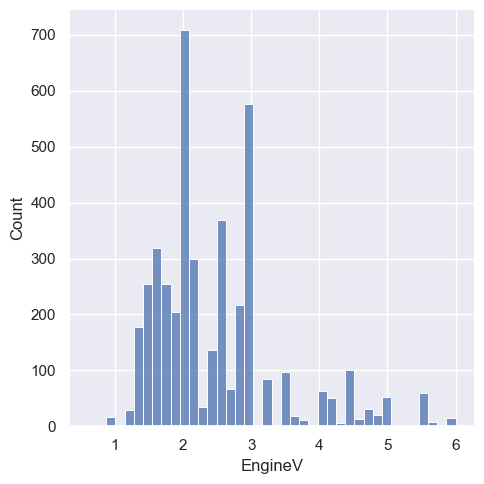

In [245]:
quantile = data.loc[:, 'EngineV'].quantile(0.99)
data = data.loc[data.loc[:, 'EngineV'] <= quantile]
sns.displot(data.loc[:, 'EngineV'])

In [246]:
data = data.reset_index(drop=True)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4297,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014
4298,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999
4299,BMW,8000.0,sedan,194,2.000000,Petrol,yes,1985
4300,Toyota,14200.0,sedan,31,2.790734,Petrol,yes,2014


In [248]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4302,4302.000000,4302,4302.000000,4302.000000,4302,4302,4302.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,931,NaN,1627,NaN,NaN,2011,3910,NaN
mean,NaN,19282.099474,NaN,161.400744,2.475760,NaN,NaN,2006.549047
std,NaN,24723.118091,NaN,105.850883,0.929949,NaN,NaN,6.728348
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7112.500000,NaN,86.000000,1.900000,NaN,NaN,2003.000000
50%,NaN,11900.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20844.362500,NaN,230.000000,3.000000,NaN,NaN,2012.000000
